# *Assignment 1: Observational Astronomy using Python QSTP'22*

---


In this assignment, we will workout a few questions in order to understand the working and application on the various numpy and astropy packages.
Few things to be kept in mind for the assignment

1) **Make a copy** of this colab file and **rename it** with your name.

2) Write your code lines where mentioned to fill the code block.

3) The assignment has questions based on Astropy, Matplotlib, Pandas and Numpy

4) You will be awarded marks out of 5 for each question.

5) You are expected to submit your completed and renamed colab file in the Assignment 1 section of the Google Classroom.

In [ ]:
# Notebook setup
import numpy as np
import matplotlib as mlt
import pandas as pd
import astropy as ap


Question 1: Express the distance between *Jupiter and Sun* in parsecs and lightyears. For this you can import the required subpackages and use the various conversion functions and the astronomical constants.

In [ ]:
# insert your code for Ques 1 here

#distance between the sun and the jupiter is 742.24 million km

dist = 742.24e+6 * ap.units.km

dist.to(ap.units.parsec)


<Quantity 2.40543602e-05 pc>

Question 2: *Hubble’s law*
> v = H*r , where v is the line-of-sight velocity of an object, r its distance from us and the proportionality constant H is called the Hubble constant.

In astronomy, the velocity is measured in km s^−1. The distance of galaxies is measured in Mpc or million parsec. Find the dimensions of H. We know roughly estimate H to be 70 km s−1/Mpc−1. Estimate the age of the universe, given that the age of universe can be calculated as the inverse of Hubble's constant. 

In [ ]:
# insert your code for Question 2 here

#Hubble constant is roughly 70 kms-1/Mpc

#dimension of Hubble Constant, [H] = [v]/[r]
hc = (70 * ap.units.km / (ap.units.s * ap.units.mpc)).decompose()

dim = hc.unit

print("Dimension of Hubble Constant : ",dim)

age = 1/hc

print("Age of the universe : ",age)

Dimension of Hubble Constant :  1 / s
Age of the universe :  440811083.0701954 s


Question 3: Taking previous question as the basis, learn and implement the code given in the following tutorial link: [redshift and age plot tutorial](https://learn.astropy.org/tutorials/redshift-plot.html)

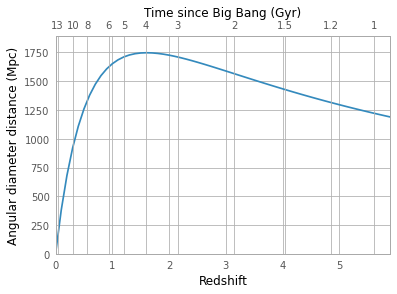

In [ ]:
# insert your code for Question 3 here

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# In this case we just need to define the matter density 
# and hubble parameter at z=0.

# Note the default units for the hubble parameter H0 are km/s/Mpc. 
# We will pass in a `Quantity` object with the units specified. 

cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)
#Note that we could instead use one of the built-in cosmologies, like WMAP9 or Planck13, in which case we would just redefine the cosmo variable.

#Now we need an example quantity to plot versus redshift. Let's use the angular diameter distance, which is the physical transverse distance (the size of a galaxy, say) corresponding to a fixed angular separation on the sky. To calculate the angular diameter distance for a range of redshifts:

import numpy as np
zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

#Note that we passed an array of redshifts to cosmo.angular_diameter_distance and it produced a corresponding array of distance values, one for each redshift. Let's plot them:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)

#AGE ARRAY FOR THE PLOT
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr

#To link the redshift and age axes, we have to find the redshift corresponding to each age. The function z_at_value does this for us.
from astropy.cosmology import z_at_value
ageticks = [z_at_value(cosmo.age, age) for age in ages]

ax2 = ax.twiny()
ax2.set_xticks(ageticks)

#TO LABEL THE SECOND AXIS WITH AGE AND NOT REDSHIFT
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])

#TO LINE UP SECOND AXIS REDSHIFT WITH THE FIRST PROPERLY, WE SET LIMIT
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)

#NOW WE LABEL THE AXES
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.set_ylim(0, 1890)
ax.minorticks_on()

Question 4: Find and plot the altitude and azimuthal of the *Andromeda galaxy* at the exact date and time of you doing this question. For reference and understanding of the steps involved you can refer to the following link: [Astropy_alt/azimuth](https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html#sphx-glr-generated-examples-coordinates-plot-obs-planning-py)

Andromeda Galaxy Altitude = -2.3 deg


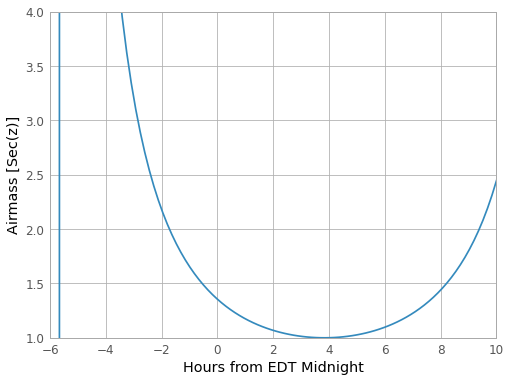

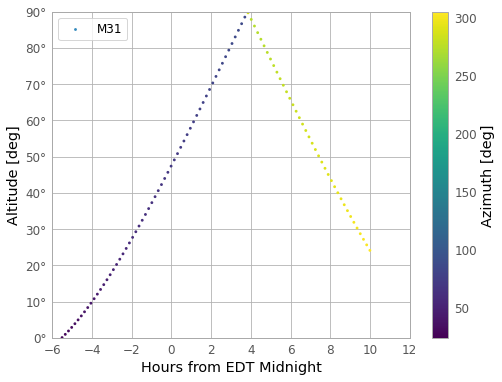

In [ ]:
# insert your code for question 4 here

import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()

#imports for location and coordinates 
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

#Andromeda Galaxy (M31)
m31 = SkyCoord.from_name('M31')

#Earth Location at 26th July'22 at 18:00 hours
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -5.5*u.hour  # Eastern Daylight Time
time = Time('2022-7-26 18:00:00') - utcoffset

#Alt Check
m31altaz = m31.transform_to(AltAz(obstime=time,location=bear_mountain))
print(f"Andromeda Galaxy Altitude = {m31altaz.alt:.2}")

#Record AltAz from 6PM to 3AM
midnight = Time('2022-7-27 00:00:00') - utcoffset
delta_midnight = np.linspace(-6, 10, 100)*u.hour
frame_July26 = AltAz(obstime=midnight+delta_midnight,
                          location=bear_mountain)
m31altazs_July26 = m31.transform_to(frame_July26)

#Airmass from AltAz info
m31airmasss_July26 = m31altazs_July26.secz

#Plot airmass
plt.plot(delta_midnight, m31airmasss_July26)
plt.xlim(-6, 10)
plt.ylim(1, 4)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.show()

#Plot for Alt&Az
plt.scatter(delta_midnight, m31altazs_July26.alt,
            c=m31altazs_July26.az, label='M31', lw=0, s=8,
            cmap='viridis')

plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-6*u.hour, 3*u.hour)
plt.xticks((np.arange(10)*2-6)*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

Question 5: Following is a zip'ped FITS file (also attached with the assignment on google classroom) from the Digitized Sky survey 2 of the *Andromeda galaxy Messier 42* through an R filter. You need to read and plot the image from the same. [Andromeda_FITSimage](https://esahubble.org/static/projects/fits_liberator/datasets/m42/m42_40min_red.zip)

For reference and understanding of the steps involved you can refer to the following link:[Astropy_fits](https://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html#sphx-glr-generated-examples-io-plot-fits-image-py) or use this tutorial link: [FITS_tutorial](https://learn.astropy.org/tutorials/FITS-images.html)

Filename: /content/m42_40min_red.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (2376, 2381)   int16   
Dimensions of data:  (2381, 2376)
Min: 1845
Max: 22512
Mean: 14795.749599452456
Stdev: 4558.575366278035


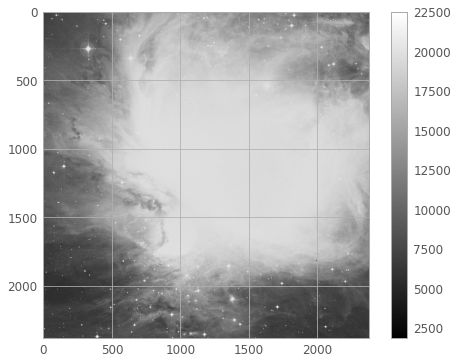

In [ ]:
# insert your code for question 5 here

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np

#Upload the provided file in the notebook's session storage and according mention the path.
image_file = get_pkg_data_filename('/content/m42_40min_red.fits')

#Display structure of file
fits.info(image_file)

#Stores data as 2D numpy array
image_data = fits.getdata(image_file, ext=0)

#Prints dimesions
print("Dimensions of data: ",image_data.shape)

#Image
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

#Image Statistics
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))


<class 'numpy.ndarray'>
(5657256,)


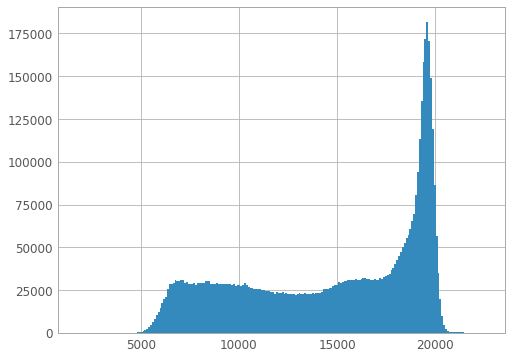

In [ ]:
#Flatten to 1D for histogram
print(type(image_data.flatten()))
print(image_data.flatten().shape)

#Plot Histogram
histogram = plt.hist(image_data.flatten(), bins='auto')

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

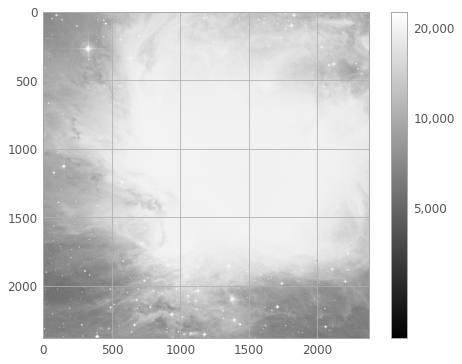

In [ ]:
#Logarithmic Scale

from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

Question 6: The NASA Exoplanet Archive has shared the confirmed names for the exoplanets from Kepler and K2 satellites. You need to download the csv file and use the pandas library and thereby find the number of planets that have K2 name and default name also list them out.
Data link (csv file also attached with the assignment on google classroom) : [K2names](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=k2_conf_names)

In [16]:
# insert your code for question 6 here

import pandas as pd

df = pd.read_csv('k2_conf_names.csv')

#Dataset of exoplanets with default names
df1 = df[~df.pl_name.str.startswith('K2')]

print("Number of exoplanets that have default names: ",len(df1))

print("The List of the same is as follows: ")

print(df1)

Number of exoplanets that have default names:  90
The List of the same is as follows: 
      k2_name           pl_name
0      K2-1 b         WASP-28 b
5    K2-103 b  EPIC 211822797 b
8    K2-106 b  EPIC 220674823 b
9    K2-106 c  EPIC 220674823 c
12   K2-109 b       HD 106315 b
..        ...               ...
552   K2-93 f       HIP 41378 f
553   K2-94 b       WASP-85 A b
555   K2-96 b         HD 3167 b
556   K2-96 c         HD 3167 c
557   K2-96 d         HD 3167 d

[90 rows x 2 columns]
